In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict

import sys
if "../" not in sys.path:
  sys.path.append("../")

import gym
import plotting
from lib.envs.windy_gridworld import WindyGridworldEnv
import itertools
matplotlib.style.use('ggplot')

## Create Environment

In [2]:
env = WindyGridworldEnv()

In [3]:
env.observation_space.n

70

In [4]:
print env.reset()
env.render()

print env.step(3)
env.render()

30
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o

(30, -1.0, False, {'prob': 1.0})
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o



## SARSA On Policy TD Control

In [5]:
#Create an initial epsilon soft policy
def epsilon_greedy_policy(Q, epsilon, state, nA):
    A = np.ones(nA, dtype=float) * epsilon / nA
    best_action = np.argmax(Q[state])
    A[best_action] += (1.0 - epsilon)
    return A



In [9]:
def sarsa(env, num_episodes, epsilon=0.1, alpha=0.5, discount=1.0, debug=False):
    
    Q = defaultdict(lambda: np.zeros(env.action_space.n, dtype=float))
    
    episode_lengths = defaultdict(float)
    episode_rewards = defaultdict(float)
    

    for i_episode in range(1, num_episodes+1):
        
        if debug:
            if i_episode % 100 == 0:
                print("\rEpisode {}/{}.".format(i_episode, num_episodes))
                
        state = env.reset()
        action_probs = epsilon_greedy_policy(Q, epsilon, state, env.action_space.n)
        action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
        
        for t in itertools.count():
            next_state, reward, end, _ = env.step(action)
            
            next_action_probs = epsilon_greedy_policy(Q, epsilon, next_state, env.action_space.n)
            next_action = np.random.choice(np.arange(len(next_action_probs)), p=next_action_probs)
            
            Q[state][action] += alpha * (reward + discount*Q[next_state][next_action] - Q[state][action])
            
            episode_rewards[i_episode] += reward
            episode_lengths[i_episode] = t
            
            if end:
                break
            state = next_state
            action = next_action
            
    return Q, episode_lengths, episode_rewards

In [10]:
Q, episode_lengths, episode_rewards = sarsa(env, 200, debug=True)

Episode 100/200.
Episode 200/200.


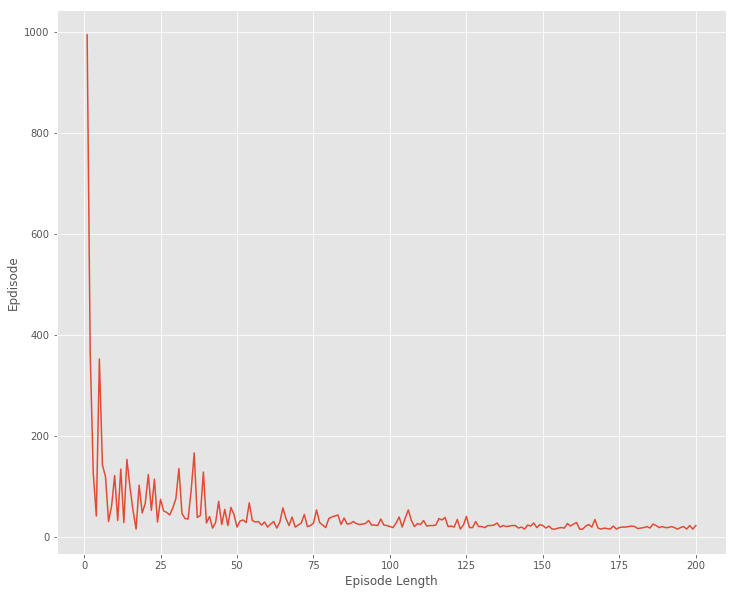

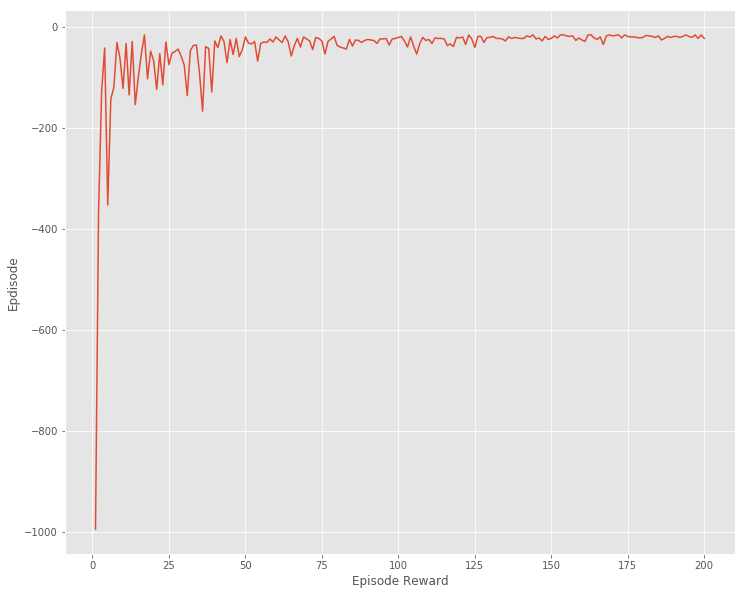

In [21]:
plt.figure(1, figsize=(12,10))
plt.plot(episode_lengths.keys(), episode_lengths.values())
plt.xlabel('Episode Length')
plt.ylabel('Epdisode')

plt.figure(2, figsize=(12,10))
plt.plot(episode_rewards.keys(), episode_rewards.values())
plt.xlabel('Episode Reward')
plt.ylabel('Epdisode')